In [346]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [347]:
% cd "/content/drive/MyDrive/Data Analysis/Project"
% ls .

/content/drive/MyDrive/Data Analysis/Project
covid.csv  progress.ipynb  us_state_vaccinations.csv  vaccinations.csv


#### **Libraries**

In [348]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

## **Covid Cases & Deaths**

In [349]:
df = pd.read_csv('covid.csv')
df.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,03/11/2021,KS,297229,241035.0,56194.0,0,0.0,4851,NaN,NaN,0,0.0,03/12/2021 03:20:13 PM,Agree,NaN
1,02/12/2021,UT,359641,359641.0,0.0,1060,0.0,1785,1729.0,56.0,11,2.0,02/13/2021 02:50:08 PM,Agree,Agree
2,02/04/2020,AR,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Not agree,Not agree
3,12/06/2021,MP,1104,1104.0,0.0,0,0.0,5,5.0,0.0,2,0.0,12/08/2021 12:00:00 AM,Agree,Agree
4,05/09/2021,PW,0,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,05/10/2021 02:15:36 PM,NaN,NaN


In [350]:
df['submission_date'] = pd.to_datetime(df['submission_date'])
df = df.sort_values(by=['submission_date'], ascending=True)

In [351]:
new_cases_by_state = df.groupby(by='state')['new_case'].sum().reset_index(name ='NewCases')

fig = go.Figure(data=go.Choropleth(
    locations=new_cases_by_state['state'], # Spatial coordinates
    z = new_cases_by_state['NewCases'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Thousands",
))

fig.update_layout(
    title_text = 'Covid Cases by States',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [352]:
new_death_by_state = df.groupby(by='state')['new_death'].sum().reset_index(name ='NewDeath')

fig = go.Figure(data=go.Choropleth(
    locations=new_death_by_state['state'], # Spatial coordinates
    z = new_death_by_state['NewDeath'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Thousands",
))

fig.update_layout(
    title_text = 'Covid Deaths by States',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [353]:
utah = pd.DataFrame(new_cases_by_state[new_cases_by_state['state'] == 'UT'])
utah['Total Deaths'] = new_death_by_state['NewDeath'][new_death_by_state['state'] == 'UT']
utah.rename(columns={'NewCases':'Total Cases'}, inplace=True)
utah

,state,Total Cases,Total Deaths
52,UT,927165,4671


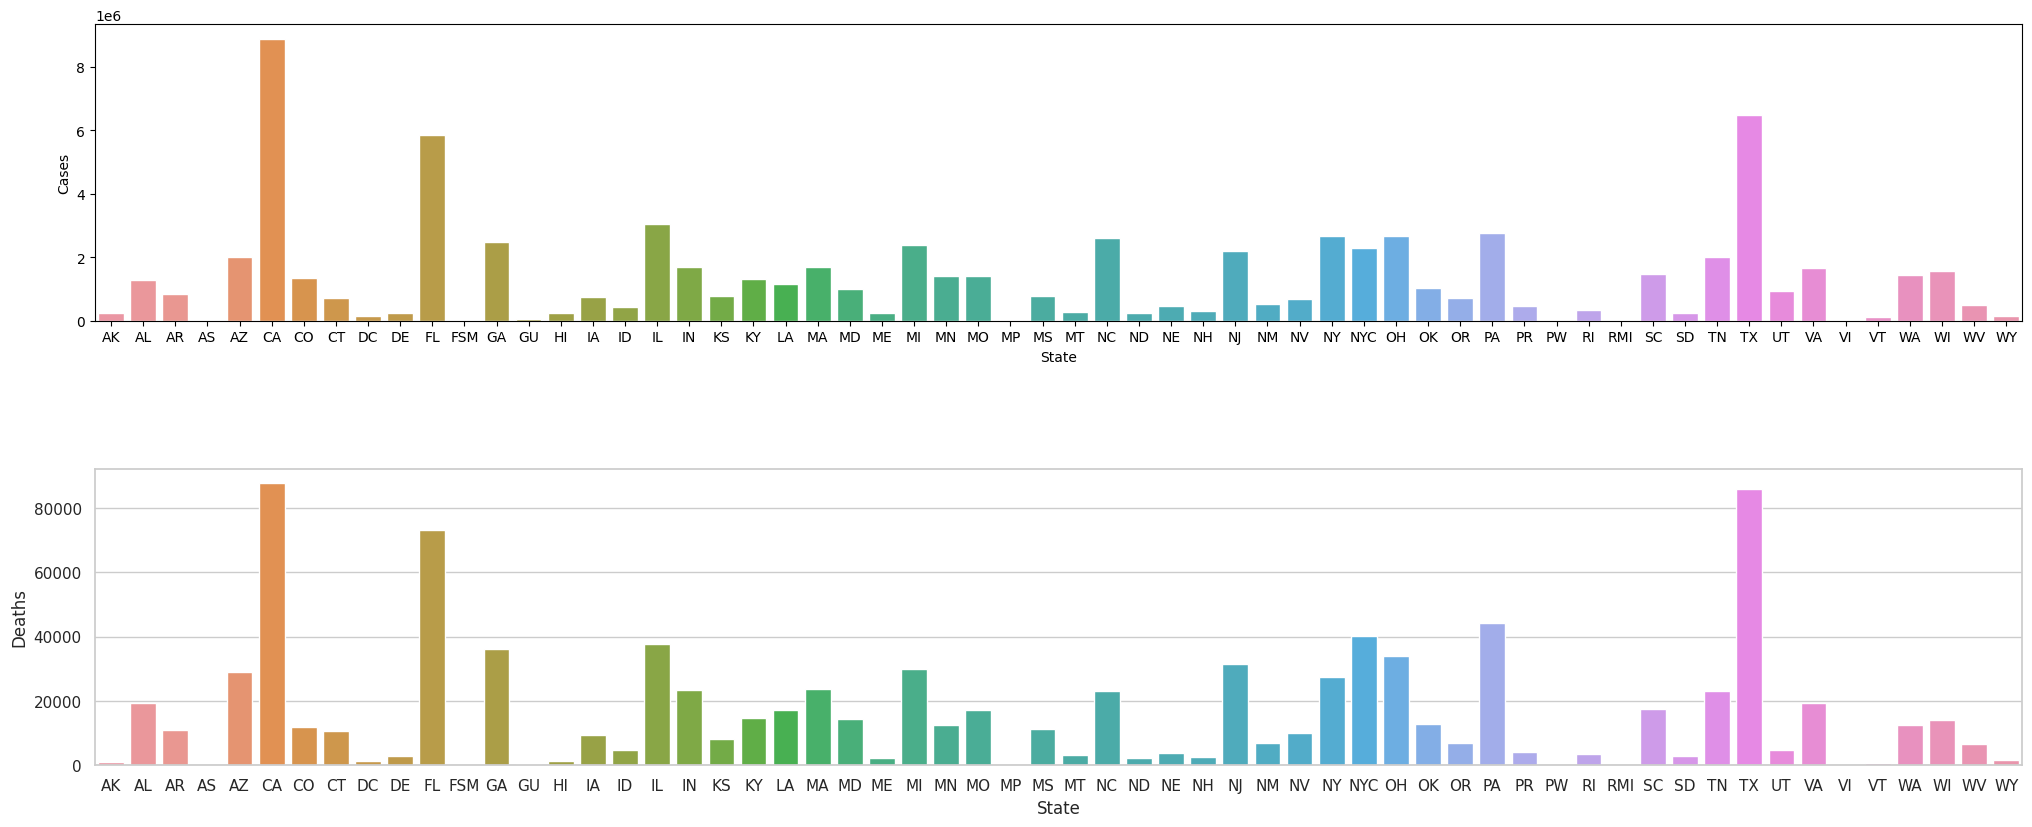

In [354]:
fig, ax = plt.subplots(2, 1, figsize=(20,8))
fig.tight_layout()

ax = plt.subplot(2,1,1)
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="state", y="NewCases", data=new_cases_by_state)
plt.xlabel('State')
plt.ylabel('Cases')

ax = plt.subplot(2,1,2)
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="state", y="NewDeath", data=new_death_by_state)
plt.xlabel('State')
plt.ylabel('Deaths')

plt.subplots_adjust(hspace=0.5)

plt.show()

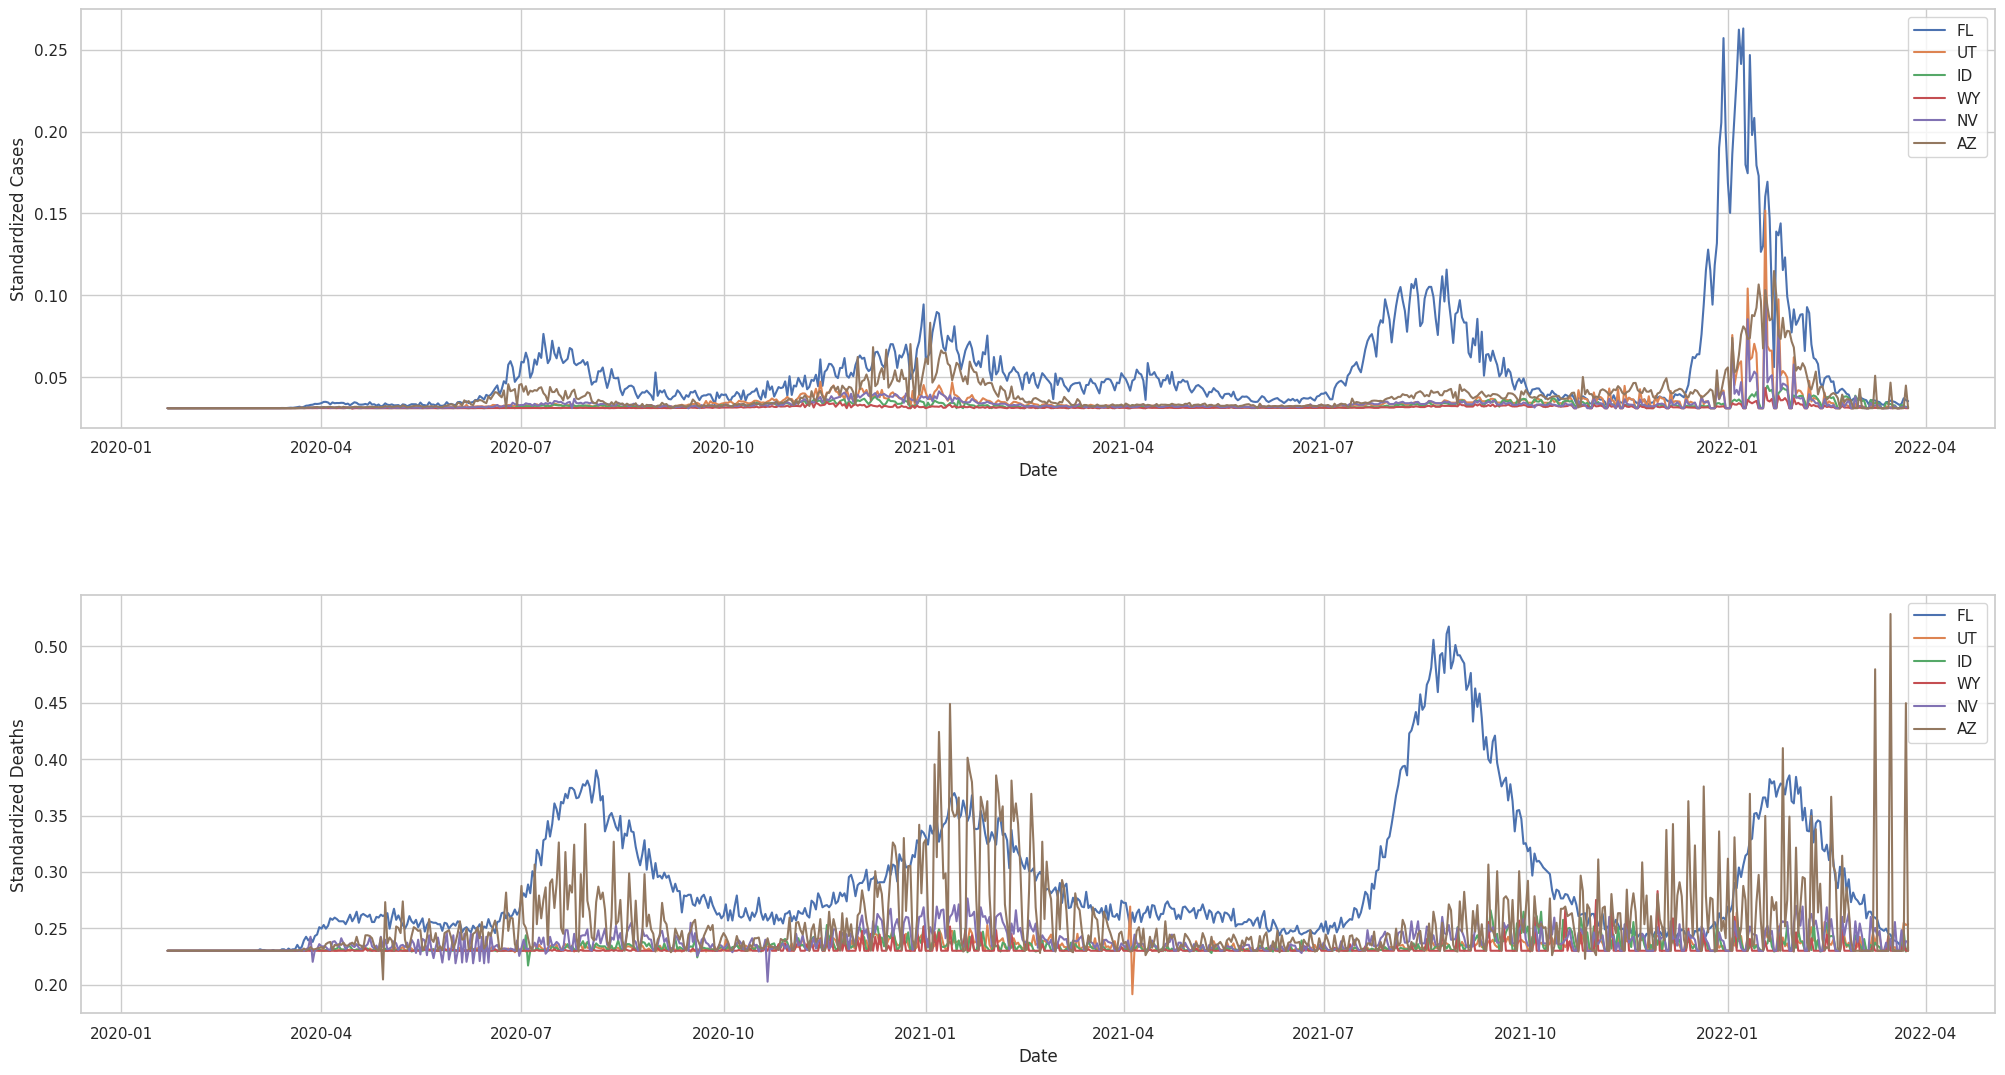

In [355]:
fig, ax = plt.subplots(2, 1, figsize=(20,7))
fig.tight_layout()

ax = plt.subplot(2,1,1)
df1 = df.copy()

ct = ColumnTransformer([
        ('somename', MinMaxScaler(), ['new_case'])
    ], remainder='passthrough')

temp = df1
df1['new_case'] = ct.fit_transform(temp)[:,0]
selected_state = ['FL','UT', 'ID', 'WY', 'NV','AZ']
for i in selected_state:

  cases_per_state = df1[df1['state'] == i]
  plt.plot(cases_per_state['submission_date'],cases_per_state['new_case'], label=i)
plt.xlabel('Date')
plt.ylabel('Standardized Cases')
plt.legend()

ax = plt.subplot(2,1,2)
ct = ColumnTransformer([
        ('somename', MinMaxScaler(), ['new_death'])
    ], remainder='passthrough')

temp = df1
df1['new_death'] = ct.fit_transform(temp)[:,0]

selected_state = ['FL','UT', 'ID', 'WY', 'NV','AZ']
for i in selected_state:

  cases_per_state = df1[df1['state'] == i]
  plt.plot(cases_per_state['submission_date'],cases_per_state['new_death'], label=i)
plt.xlabel('Date')
plt.ylabel('Standardized Deaths')
plt.legend()

plt.subplots_adjust(top=1.5, 
                    hspace=0.4)

plt.show()

## **Covid Vaccination**

In [356]:
vaccine = pd.read_csv('us_state_vaccinations.csv')
vaccine['date'] = pd.to_datetime(vaccine['date'])
vaccine = vaccine.sort_values(by=['date'], ascending=True)
vaccine.head()

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
23867,2020-12-20,United States,556208.0,NaN,NaN,NaN,0.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23868,2020-12-21,United States,614117.0,NaN,NaN,NaN,0.18,NaN,NaN,NaN,57909.0,57909.0,174.0,NaN,NaN,NaN
23869,2020-12-22,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127432.0,384.0,NaN,NaN,NaN
23870,2020-12-23,United States,1008025.0,NaN,NaN,NaN,0.30,NaN,NaN,NaN,NaN,150606.0,454.0,NaN,NaN,NaN
23871,2020-12-24,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,191001.0,575.0,NaN,NaN,NaN


In [357]:
vaccine2 = vaccine.copy()

us_states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Washington DC', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
vaccine2 = vaccine2.loc[vaccine2['location'].isin(us_states)]
states = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'
}
inv_map = {v: k for k, v in states.items()}
vaccine2['state_abbrev'] = vaccine2['location'].map(inv_map)
vaccine2.head()

vaccine3 = vaccine.copy()
inv_map = {v: k for k, v in states.items()}
vaccine3['state_abbrev'] = vaccine3['location'].map(inv_map)

In [358]:
vaccines_by_state = vaccine2.groupby(by='state_abbrev')['daily_vaccinations'].sum().reset_index(name ='vaccines')
locations=vaccines_by_state['state_abbrev'], # Spatial coordinates
z = vaccines_by_state['vaccines'], # Data to be color-coded
import plotly.graph_objects as go
fig = go.Figure(data=go.Choropleth(
    locations=vaccines_by_state['state_abbrev'], # Spatial coordinates
    z = vaccines_by_state['vaccines'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Thousands",
))

fig.update_layout(
    title_text = 'Vaccination by States',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [359]:
tempUT = vaccines_by_state[vaccines_by_state['state_abbrev'] == 'UT']
tempUT.columns = ['State', 'Total Vaccination']
tempUT

,State,Total Vaccination
42,UT,5039895.0


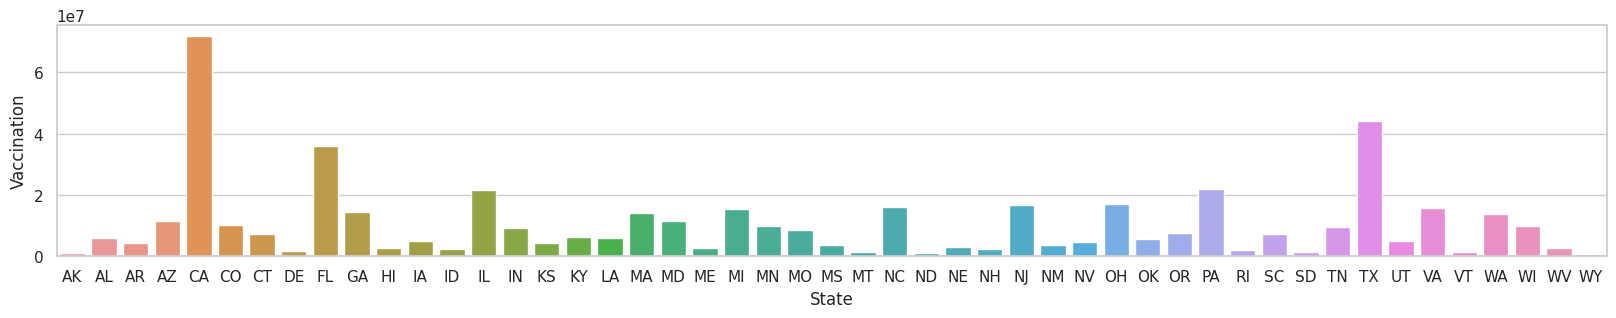

In [360]:
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (20,3)
ax = sns.barplot(x="state_abbrev", y="vaccines", data=vaccines_by_state)
plt.xlabel('State')
plt.ylabel('Vaccination')
plt.show()

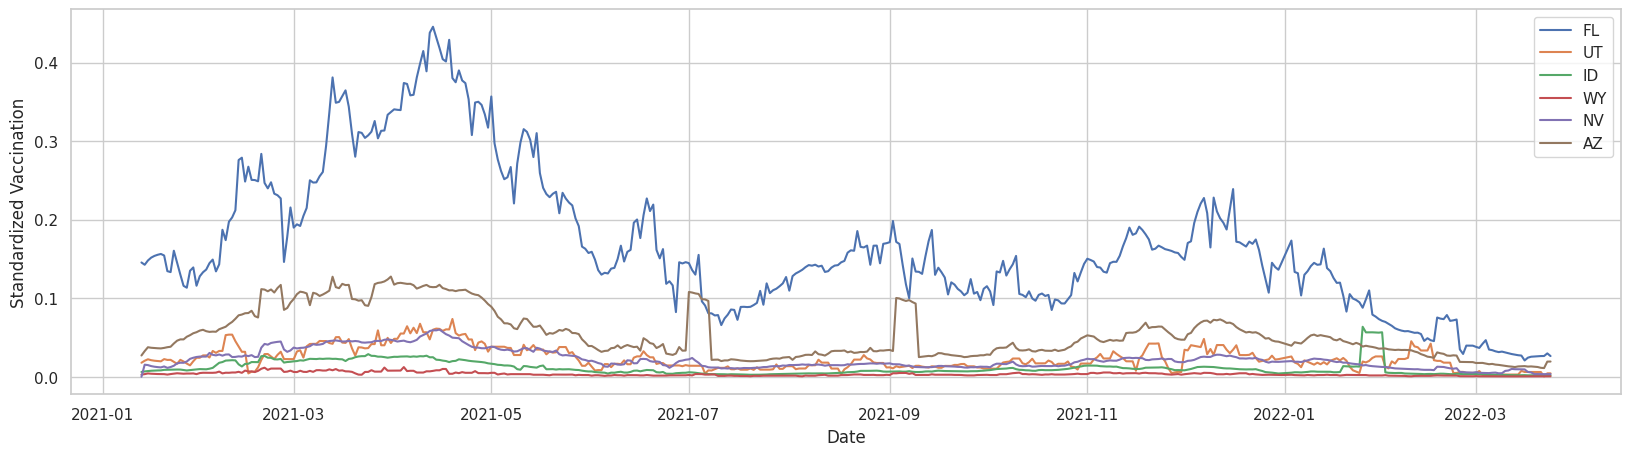

In [361]:
ct = ColumnTransformer([
        ('somename', MinMaxScaler(), ['daily_vaccinations'])
    ], remainder='passthrough')

temp = vaccine2
vaccine2['daily_vaccinations'] = ct.fit_transform(temp)[:,0]

plt.rcParams["figure.figsize"] = (20,5)
selected_state = ['FL','UT', 'ID', 'WY', 'NV','AZ']
for i in selected_state:

  vaccines_by_state = vaccine2[vaccine2['state_abbrev'] == i]
  plt.plot(vaccines_by_state['date'],vaccines_by_state['daily_vaccinations'], label=i)
plt.xlabel('Date')
plt.ylabel('Standardized Vaccination')
plt.legend()
plt.show()

## **Covid Cases, Deaths and Vaccination over time for some states**

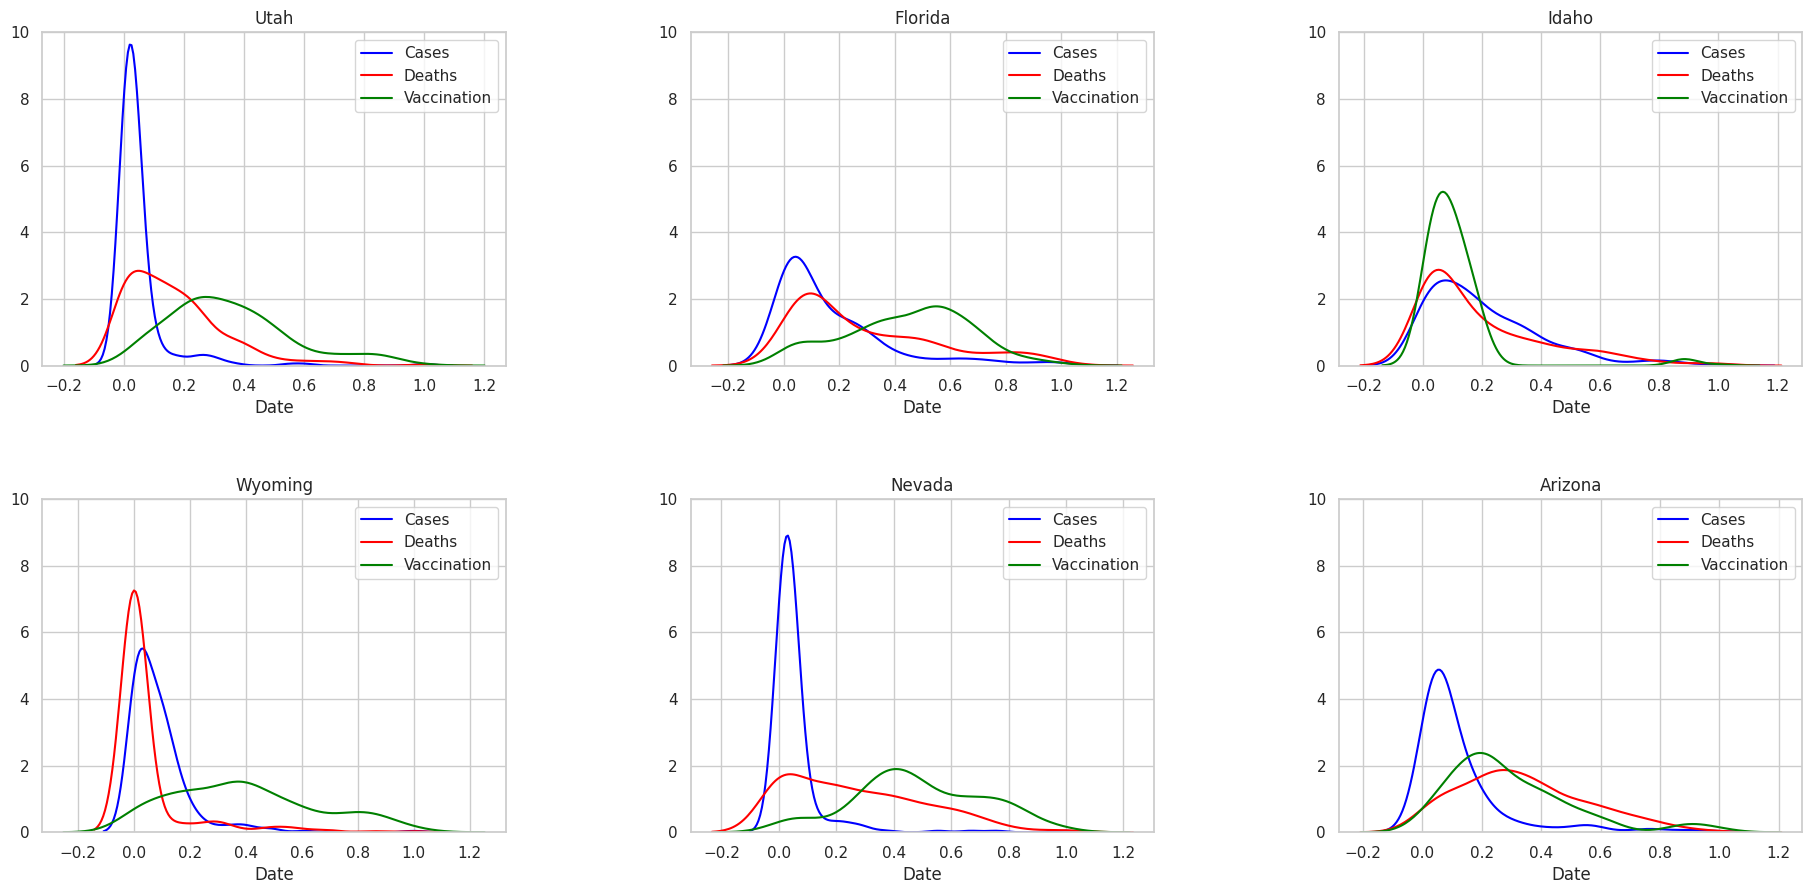

In [362]:
fig, ax = plt.subplots(2, 3, figsize=(22,10))
fig.tight_layout()

ax = plt.subplot(2,3,1)
Case = df[(df['state'] == 'UT') & (df['submission_date'] >= '2021-07-01')]
Case = Case[['submission_date', 'new_case', 'new_death']]
Case[['new_case']] = scaler.fit_transform(Case[['new_case']])
Case[['new_death']] = scaler.fit_transform(Case[['new_death']])

Vaccine = vaccine[(vaccine['location'] == 'Utah') & (vaccine['date'] >= '2021-07-01')]
Vaccine = Vaccine[['date','location','daily_vaccinations']]
Vaccine = Vaccine.dropna()
Vaccine[['daily_vaccinations']] = scaler.fit_transform(Vaccine[['daily_vaccinations']])

sns.distplot(Case.new_case, hist=False, label='Cases', color="blue")
sns.distplot(Case.new_death, hist=False, label='Deaths', color="red")
sns.distplot(Vaccine.daily_vaccinations, hist=False, label='Vaccination', color="green")
plt.legend()

plt.xlabel('Date')
plt.ylabel('')
plt.ylim([0, 10])
plt.title('Utah')


ax = plt.subplot(2,3,2)
Case = df[(df['state'] == 'FL') & (df['submission_date'] >= '2021-07-01')]
Case = Case[['submission_date', 'new_case', 'new_death']]
Case[['new_case']] = scaler.fit_transform(Case[['new_case']])
Case[['new_death']] = scaler.fit_transform(Case[['new_death']])

Vaccine = vaccine[(vaccine['location'] == 'Florida') & (vaccine['date'] >= '2021-07-01')]
Vaccine = Vaccine[['date','location','daily_vaccinations']]
Vaccine = Vaccine.dropna()
Vaccine[['daily_vaccinations']] = scaler.fit_transform(Vaccine[['daily_vaccinations']])

sns.distplot(Case.new_case, hist=False, label='Cases', color="blue")
sns.distplot(Case.new_death, hist=False, label='Deaths', color="red")
sns.distplot(Vaccine.daily_vaccinations, hist=False, label='Vaccination', color="green")
plt.legend()

plt.xlabel('Date')
plt.ylabel('')
plt.ylim([0, 10])
plt.title('Florida')


ax = plt.subplot(2,3,3)
Case = df[(df['state'] == 'ID') & (df['submission_date'] >= '2021-07-01')]
Case = Case[['submission_date', 'new_case', 'new_death']]
Case[['new_case']] = scaler.fit_transform(Case[['new_case']])
Case[['new_death']] = scaler.fit_transform(Case[['new_death']])

Vaccine = vaccine[(vaccine['location'] == 'Idaho') & (vaccine['date'] >= '2021-07-01')]
Vaccine = Vaccine[['date','location','daily_vaccinations']]
Vaccine = Vaccine.dropna()
Vaccine[['daily_vaccinations']] = scaler.fit_transform(Vaccine[['daily_vaccinations']])

sns.distplot(Case.new_case, hist=False, label='Cases', color="blue")
sns.distplot(Case.new_death, hist=False, label='Deaths', color="red")
sns.distplot(Vaccine.daily_vaccinations, hist=False, label='Vaccination', color="green")
plt.legend()

plt.xlabel('Date')
plt.ylabel('')
plt.ylim([0, 10])
plt.title('Idaho')


ax = plt.subplot(2,3,4)
Case = df[(df['state'] == 'WY') & (df['submission_date'] >= '2021-07-01')]
Case = Case[['submission_date', 'new_case', 'new_death']]
Case[['new_case']] = scaler.fit_transform(Case[['new_case']])
Case[['new_death']] = scaler.fit_transform(Case[['new_death']])

Vaccine = vaccine[(vaccine['location'] == 'Wyoming') & (vaccine['date'] >= '2021-07-01')]
Vaccine = Vaccine[['date','location','daily_vaccinations']]
Vaccine = Vaccine.dropna()
Vaccine[['daily_vaccinations']] = scaler.fit_transform(Vaccine[['daily_vaccinations']])

sns.distplot(Case.new_case, hist=False, label='Cases', color="blue")
sns.distplot(Case.new_death, hist=False, label='Deaths', color="red")
sns.distplot(Vaccine.daily_vaccinations, hist=False, label='Vaccination', color="green")
plt.legend()

plt.xlabel('Date')
plt.ylabel('')
plt.ylim([0, 10])
plt.title('Wyoming')


ax = plt.subplot(2,3,5)
Case = df[(df['state'] == 'NV') & (df['submission_date'] >= '2021-07-01')]
Case = Case[['submission_date', 'new_case', 'new_death']]
Case[['new_case']] = scaler.fit_transform(Case[['new_case']])
Case[['new_death']] = scaler.fit_transform(Case[['new_death']])

Vaccine = vaccine[(vaccine['location'] == 'Nevada') & (vaccine['date'] >= '2021-07-01')]
Vaccine = Vaccine[['date','location','daily_vaccinations']]
Vaccine = Vaccine.dropna()
Vaccine[['daily_vaccinations']] = scaler.fit_transform(Vaccine[['daily_vaccinations']])

sns.distplot(Case.new_case, hist=False, label='Cases', color="blue")
sns.distplot(Case.new_death, hist=False, label='Deaths', color="red")
sns.distplot(Vaccine.daily_vaccinations, hist=False, label='Vaccination', color="green")
plt.legend()

plt.xlabel('Date')
plt.ylabel('')
plt.ylim([0, 10])
plt.title('Nevada')


ax = plt.subplot(2,3,6)
Case = df[(df['state'] == 'AR') & (df['submission_date'] >= '2021-07-01')]
Case = Case[['submission_date', 'new_case', 'new_death']]
Case[['new_case']] = scaler.fit_transform(Case[['new_case']])
Case[['new_death']] = scaler.fit_transform(Case[['new_death']])

Vaccine = vaccine[(vaccine['location'] == 'Arizona') & (vaccine['date'] >= '2021-07-01')]
Vaccine = Vaccine[['date','location','daily_vaccinations']]
Vaccine = Vaccine.dropna()
Vaccine[['daily_vaccinations']] = scaler.fit_transform(Vaccine[['daily_vaccinations']])

sns.distplot(Case.new_case, hist=False, label='Cases', color="blue")
sns.distplot(Case.new_death, hist=False, label='Deaths', color="red")
sns.distplot(Vaccine.daily_vaccinations, hist=False, label='Vaccination', color="green")
plt.legend()

plt.xlabel('Date')
plt.ylabel('')
plt.ylim([0, 10])
plt.title('Arizona')


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

### **Utah Trend**

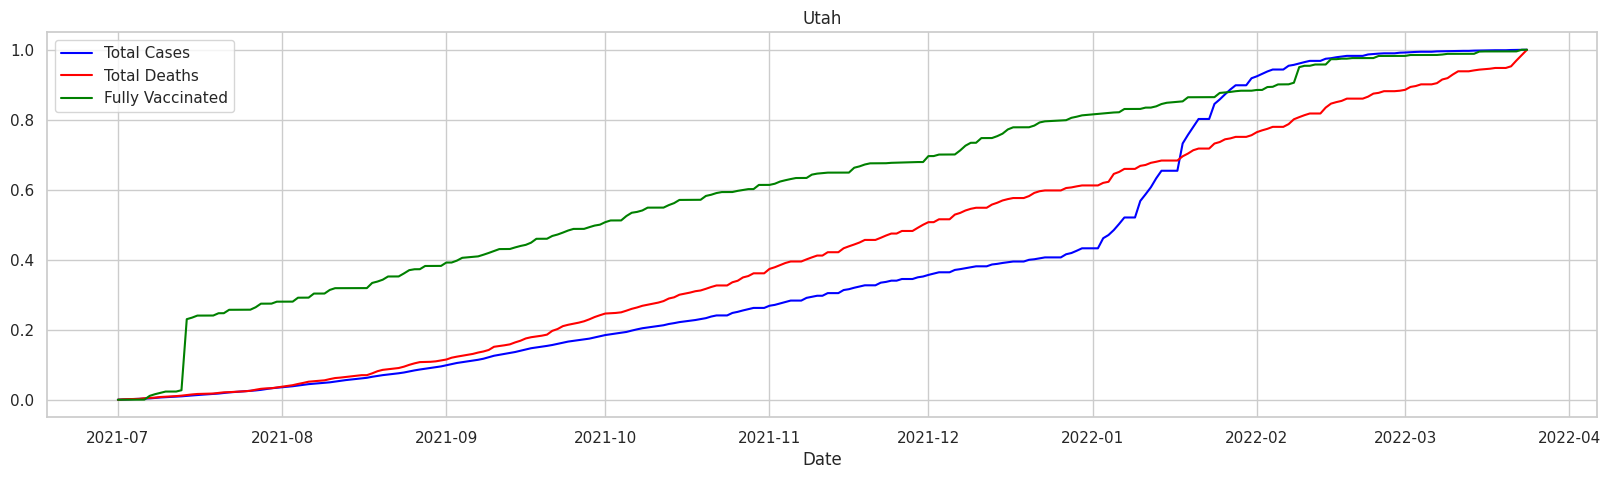

In [363]:
Case = df[(df['state'] == 'UT') & (df['submission_date'] >= '2021-07-01')]
Case = Case[['submission_date', 'tot_cases', 'tot_death']]
Case[['tot_cases']] = scaler.fit_transform(Case[['tot_cases']])
Case[['tot_death']] = scaler.fit_transform(Case[['tot_death']])

Vaccine = vaccine[(vaccine['location'] == 'Utah') & (vaccine['date'] >= '2021-07-01')]
Vaccine = Vaccine[['date','location','people_fully_vaccinated']]
Vaccine = Vaccine.dropna()
Vaccine[['people_fully_vaccinated']] = scaler.fit_transform(Vaccine[['people_fully_vaccinated']])

sns.lineplot(Case.submission_date, Case.tot_cases, color="blue", label='Total Cases')
sns.lineplot(Case.submission_date, Case.tot_death, color="red", label='Total Deaths')
sns.lineplot(Vaccine.date, Vaccine.people_fully_vaccinated, color="green", label='Fully Vaccinated')
plt.legend()

plt.xlabel('Date')
plt.ylabel('')
plt.title('Utah')
plt.show()

### **Whole USA Trend**

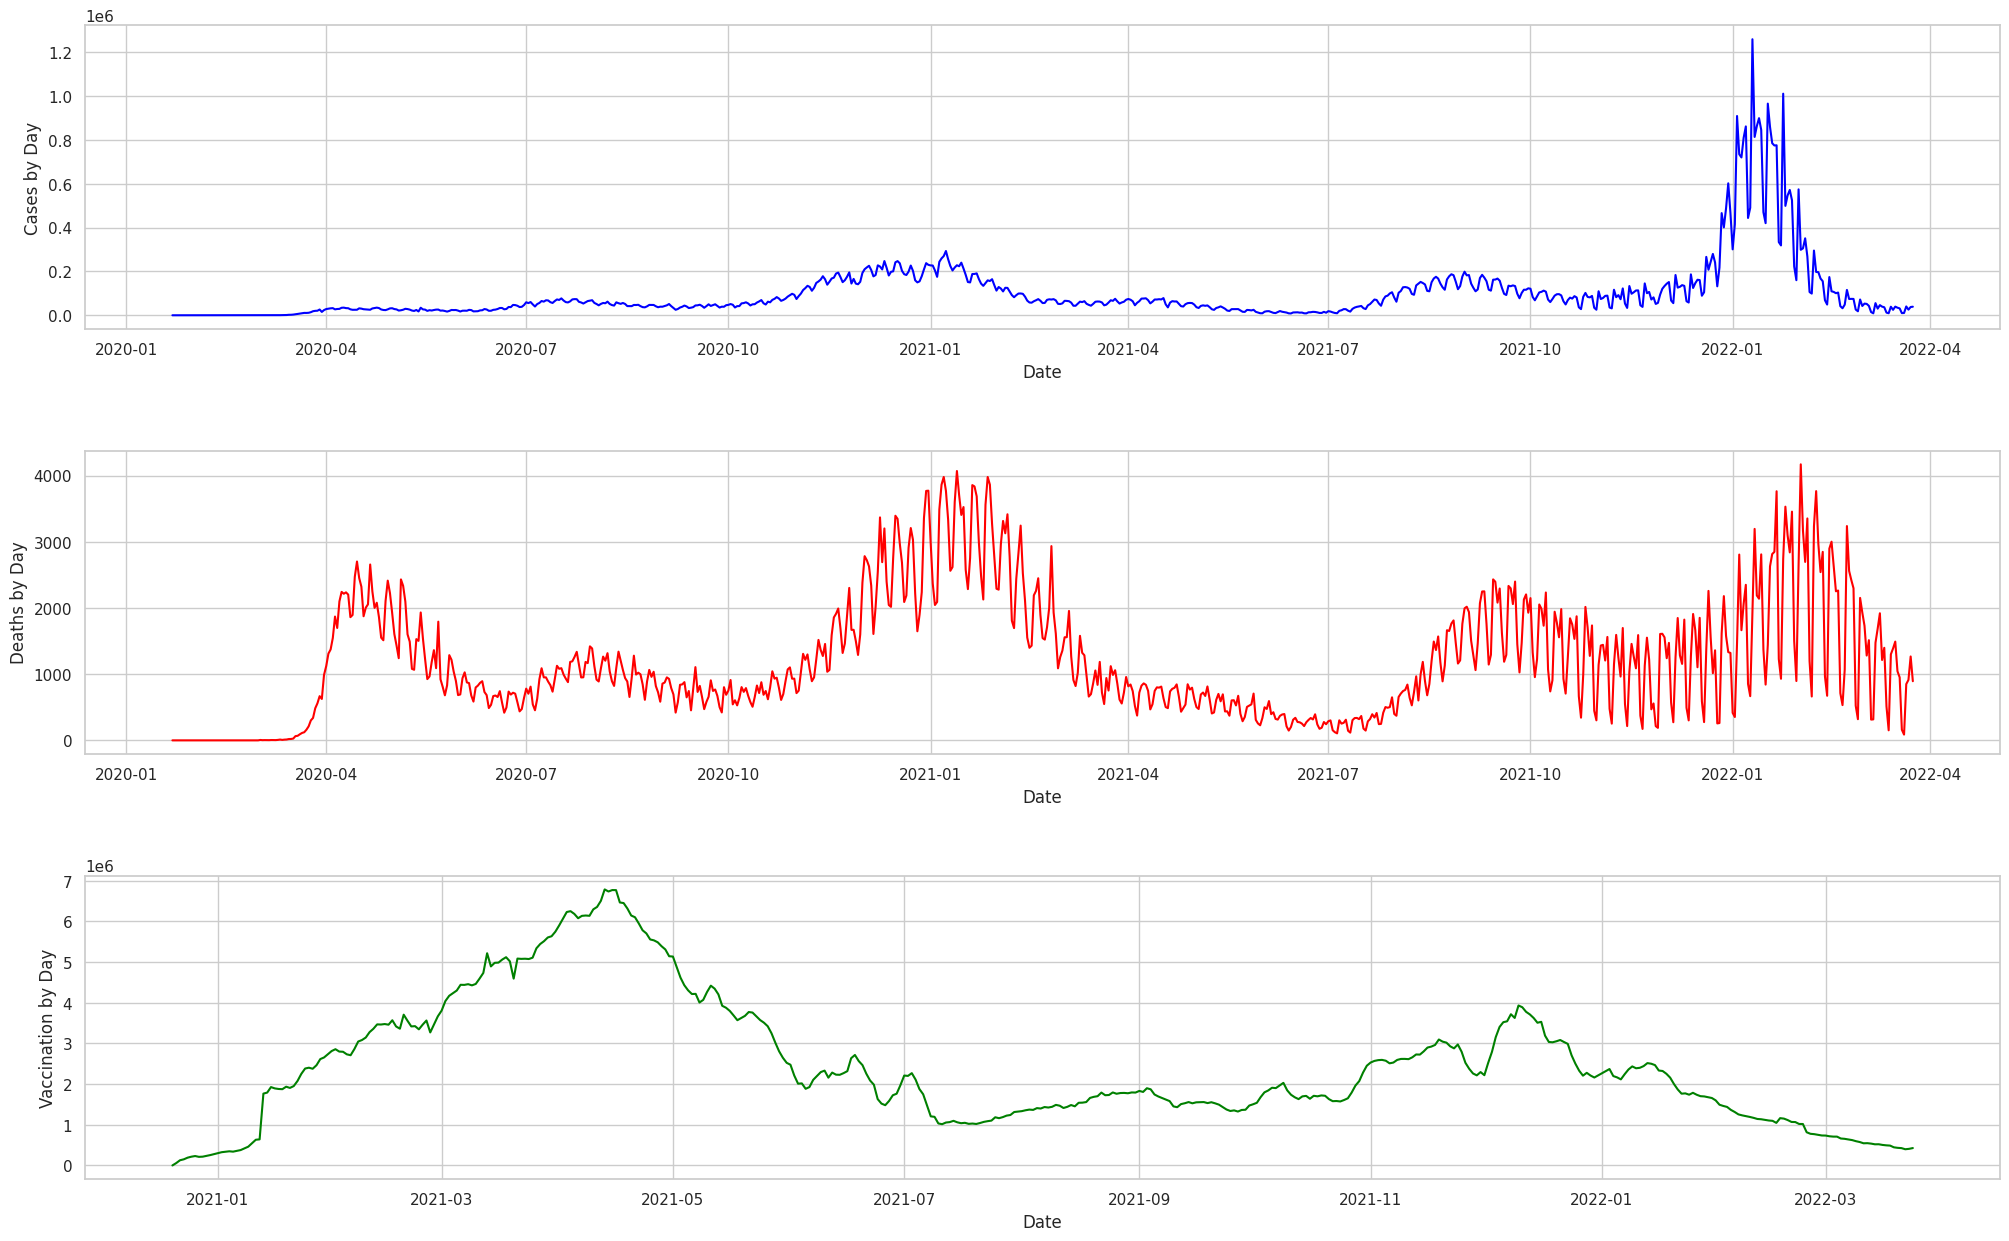

In [364]:
caseUSA = df.groupby(by='submission_date')['new_case'].sum().reset_index(name ='new_case')
deathUSA = df.groupby(by='submission_date')['new_death'].sum().reset_index(name ='new_death')
vaccineUSA = vaccine.groupby(by='date')['daily_vaccinations'].sum().reset_index(name ='daily_vaccinations')

fig, ax = plt.subplots(3, 1, figsize=(20,8))
fig.tight_layout()

ax = plt.subplot(3,1,1)
sns.lineplot(caseUSA['submission_date'],caseUSA['new_case'],color='blue')
plt.xlabel('Date')
plt.ylabel('Cases by Day')

ax = plt.subplot(3,1,2)
sns.lineplot(deathUSA['submission_date'],deathUSA['new_death'],color='red')
plt.xlabel('Date')
plt.ylabel('Deaths by Day')

ax = plt.subplot(3,1,3)
sns.lineplot(vaccineUSA['date'],vaccineUSA['daily_vaccinations'],color='green')
plt.xlabel('Date')
plt.ylabel('Vaccination by Day')

plt.subplots_adjust(top=1.5, 
                    hspace=0.4)

plt.show()

#### **Comparison of ratios of cases, deaths and vaccinations for some states**

In [365]:
from functools import reduce

case_by_state = df.groupby(by='state')['new_case'].sum().reset_index(name ='new_case')
death_by_state = df.groupby(by='state')['new_death'].sum().reset_index(name ='new_death')
vaccine_by_state = vaccine3.groupby(by='state_abbrev')['daily_vaccinations'].sum().reset_index(name ='daily_vaccinations')

case_by_state = case_by_state[(case_by_state['state']=='FL') | (case_by_state['state']=='UT') | (case_by_state['state']=='ID') | (case_by_state['state']=='WY') | (case_by_state['state']=='NV') | (case_by_state['state']=='AR')]
death_by_state = death_by_state[(death_by_state['state']=='FL') | (death_by_state['state']=='UT') | (death_by_state['state']=='ID') | (death_by_state['state']=='WY') | (death_by_state['state']=='NV') | (death_by_state['state']=='AR')]
vaccine_by_state = vaccine_by_state[(vaccine_by_state['state_abbrev']=='FL') | (vaccine_by_state['state_abbrev']=='UT') | (vaccine_by_state['state_abbrev']=='ID') | (vaccine_by_state['state_abbrev']=='WY') | (vaccine_by_state['state_abbrev']=='NV') | (vaccine_by_state['state_abbrev']=='AR')]
vaccine_by_state.columns = ['state','daily_vaccinations']

dfs = [case_by_state, death_by_state, vaccine_by_state]
df_final = reduce(lambda left,right: pd.merge(left,right,on='state'), dfs)
df_final[['new_case']] = scaler.fit_transform(df_final[['new_case']])
df_final[['new_death']] = scaler.fit_transform(df_final[['new_death']])
df_final[['daily_vaccinations']] = scaler.fit_transform(df_final[['daily_vaccinations']])
df_final.columns = ['State', 'Cases', 'Deaths', 'Vaccination']
df_final = df_final[(df_final['Cases'] != 0)|(df_final['Deaths'] != 0)|(df_final['Vaccination'] != 0)]
df_final

,State,Cases,Deaths,Vaccination
0,AR,0.118938,0.127774,0.098030
1,FL,1.000000,1.000000,1.000000
2,ID,0.050566,0.043251,0.046378
3,NV,0.092141,0.115954,0.113416
4,UT,0.135640,0.040542,0.122284


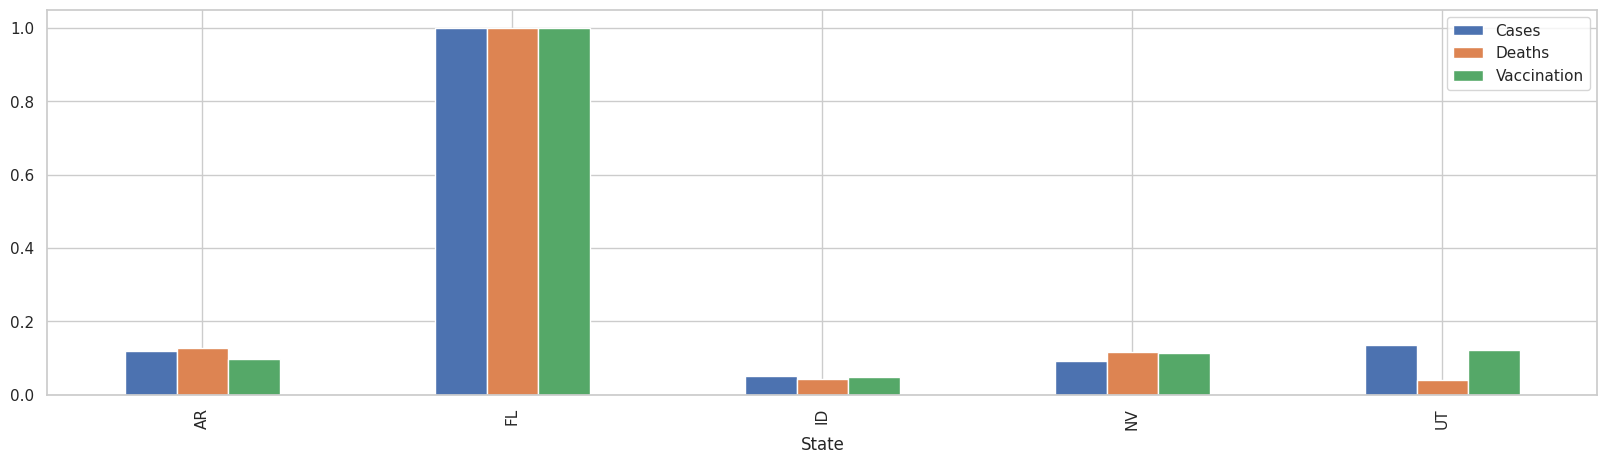

In [366]:
plt.rcParams["figure.figsize"] = (20,5)
df_final.plot(x="State", y=["Cases", "Deaths", "Vaccination"], kind="bar")
plt.xlabel('State')
plt.show()